In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [2]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [3]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [4]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [5]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [6]:
X = diamonds[feature_names]
y = diamonds['class']

In [7]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [8]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [10]:
def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## KNeighborsClassifier

In [11]:
knn = Pipeline([
    ('model', KNeighborsClassifier())
])

In [12]:
knn.fit(X_train, y_train)

Pipeline(steps=[('model', KNeighborsClassifier())])

Izvestaj o KNeighborsClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9341996305497166
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.77      0.76      0.76      1012
 (5000, 10000]       0.85      0.85      0.85      2785
        15000+       0.74      0.71      0.73       405
     [0, 5000]       0.97      0.98      0.98     11497

      accuracy                           0.93     15699
     macro avg       0.84      0.82      0.83     15699
  weighted avg       0.93      0.93      0.93     15699

-------------------------------------------------------------------
Matrica konfuzije: 


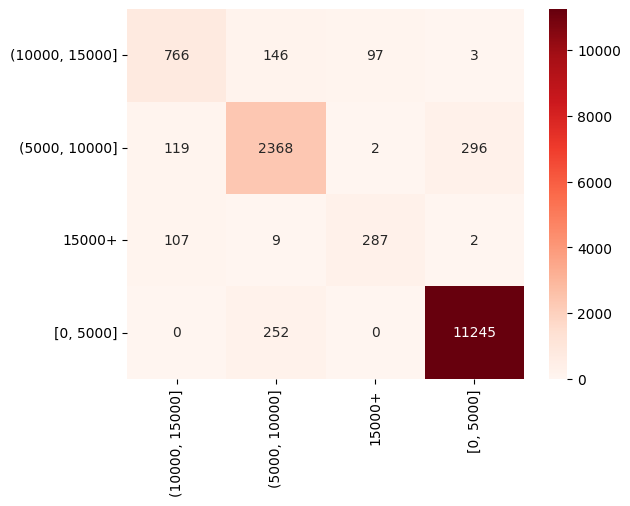

In [13]:
model_report(knn, X_test, y_test)

#### Hyperparameter tuning

In [14]:
params = {
    'model__n_neighbors' : list(np.arange(2, 10, 2)),
    'model__weights' : ['uniform', 'distance'],
    'model__algorithm' : ['auto', 'kd_tree']
}

In [15]:
grid = GridSearchCV(knn, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [16]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform;, score=0.918 total time=   0.6s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform;, score=0.920 total time=   1.0s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform;, score=0.919 total time=   1.0s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=distance;, score=0.923 total time=   0.6s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=distance;, score=0.925 total time=   0.4s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=distance;, score=0.926 total time=   0.3s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=4, model__weights=uniform;, score=0.924 total time=   0.8s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=4, model__weights=uniform;, score=0.924 total time=   0.7s
[CV 3/3] END model__algo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             param_grid={'model__algorithm': ['auto', 'kd_tree'],
                         'model__n_neighbors': [2, 4, 6, 8],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [17]:
grid.best_params_

{'model__algorithm': 'auto',
 'model__n_neighbors': 6,
 'model__weights': 'distance'}

In [18]:
knn_cv = grid.best_estimator_

Izvestaj o KNeighborsClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9393591948531753
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.80      0.77      0.79      1012
 (5000, 10000]       0.86      0.86      0.86      2785
        15000+       0.76      0.77      0.77       405
     [0, 5000]       0.98      0.98      0.98     11497

      accuracy                           0.94     15699
     macro avg       0.85      0.85      0.85     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


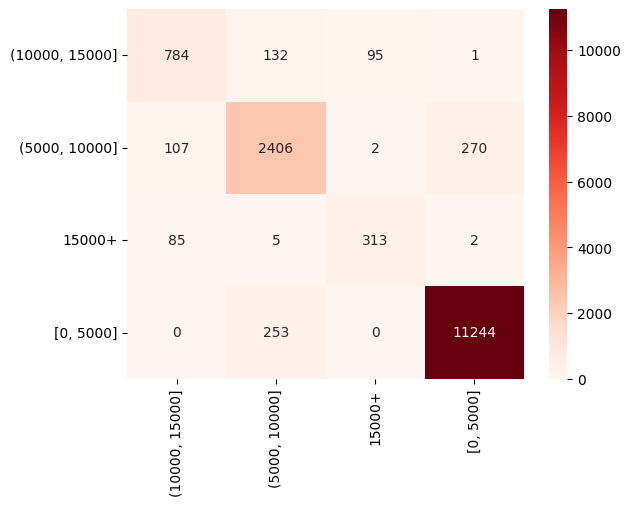

In [19]:
model_report(knn_cv, X_test, y_test)

***

### Now with PCA

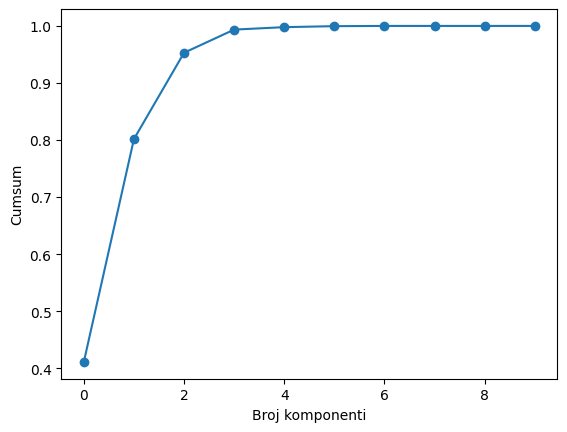

In [20]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [21]:
knn_pca = Pipeline([
    ('pca', PCA()),
    ('model', KNeighborsClassifier())
])

In [22]:
params = {
    'pca__n_components' : [2, 3, 4],
    'model__n_neighbors' : list(np.arange(2, 10, 2)),
    'model__weights' : ['uniform', 'distance'],
    'model__algorithm' : ['auto', 'kd_tree']
}

In [23]:
grid = GridSearchCV(knn_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [24]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=2;, score=0.931 total time=   0.5s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=2;, score=0.928 total time=   0.4s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=2;, score=0.928 total time=   0.5s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=3;, score=0.928 total time=   0.5s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=3;, score=0.930 total time=   0.6s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=3;, score=0.930 total time=   0.5s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=2, model__weights=uniform, pca__n_components=4;, score=0.930 total time= 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__algorithm': ['auto', 'kd_tree'],
                         'model__n_neighbors': [2, 4, 6, 8],
                         'model__weights': ['uniform', 'distance'],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=4)

In [25]:
grid.best_params_

{'model__algorithm': 'auto',
 'model__n_neighbors': 8,
 'model__weights': 'distance',
 'pca__n_components': 4}

In [26]:
knn_pca_cv = grid.best_estimator_

Izvestaj o KNeighborsClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9455379323523792
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.80      0.79      0.80      1012
 (5000, 10000]       0.87      0.89      0.88      2785
        15000+       0.76      0.77      0.77       405
     [0, 5000]       0.98      0.98      0.98     11497

      accuracy                           0.95     15699
     macro avg       0.85      0.86      0.86     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


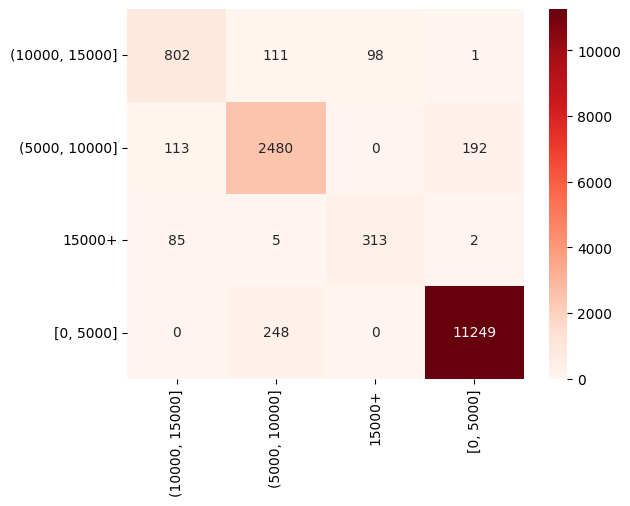

In [27]:
model_report(knn_pca_cv, X_test, y_test)

***

## Results:

In [28]:
model_names = ['knn', 'knn_cv', 'knn_pca_cv']

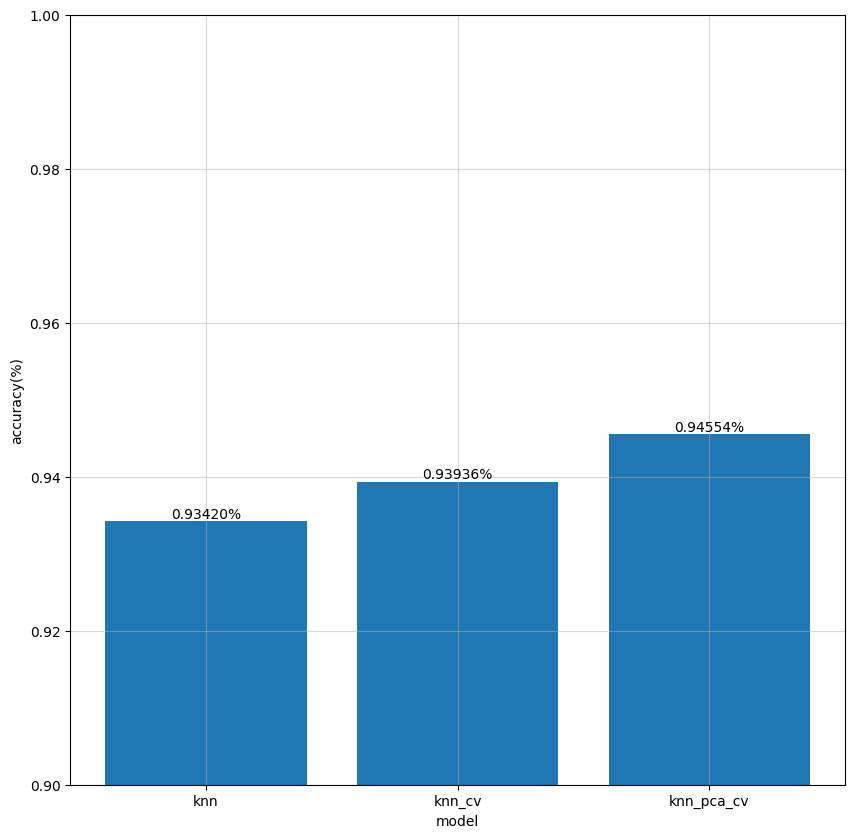

In [29]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.9, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

S obzirom na rezultate, izabracemo **knn_pca_cv** kao predstavnika **KNearestNeighbours**

In [30]:
joblib.dump(knn_pca_cv, 'KNN.pkl')

['KNN.pkl']